# Diagnosing Reinforcement Learning for Traffic Signal Control
Paper: https://arxiv.org/pdf/1905.04716.pdf

## Resumen

En este paper plantean la interrogante de cómo definir los estados y recompensa para un algoritmo de aprendizaje reforzado para manejo de semáforos.

El objetivo final de una optimización de las luces de tráfico se puede ver como la minimización de los tiempos de viaje. Sin embargo, es muy difícil definir explicitamente este objetivo. Estudios han definido la recompensa como una combinación lineal de diferentes métricas del estado del tráfico vehicular. Sin embargo, no hay ninguna garantía de que el tiempo de viaje se logre minimizar con estas métricas.

Por otra parte, acercamientos de RL usan estados más complicados como, por ejemplo, imágenes para describir la situación actual del tráfico. No obstante, no hay estudios que respalden la decisión de usar estos estados tan complejos. Esta complejidad extra podria incluso demorar el proceso de aprendizaje y no traer ningun beneficio.

En este paper se propone re examinar los acercamientos mediante RL a través de la teoría tradicional del transporte. Se plantean las siguientes interrogantes:

- ¿Cómo se debería diseñar la recompensa de tal manera que se garantice minimizar los tiempos de viaje?

- ¿Cómo diseñar un estado que represente de manera concisa y suficiente para optener la solución óptima?

Finalmente, este paper propone el uso del método LIT, que es respaldado por la teoría clásica del control de semáforos. LIT posee estados y recompensas muy simples y por lo que sirve como un bloque de construcción para futuros acercamientos de RL en esta área de estudio.

Los experimentos que se realizan son tanto con datasets simulados como reales, y se demuestra que el método presentado obtiene resultados del estado del arte.


## Introducción

El objetivo último de la mayoría de los sistemas urbanos de transporte es la minimización del tiempo de viaje de todos los vehículos. En general el tiempo de las luces de tránsito se modela como un problema de optimización. Una de las debilidades clave de este alcance es que tiene supuestos irreales necesarios para que el problema sea tratable, como la tasa uniforme de llagada de los vehículos y la capacidad ilimitada de las pistas

Por otra parte, el reciente avance en el área del RL, investigadores han empezado a manejar el problema de control de señles de tránsito a traves del ensayo y error. Comparado con las técnicas tradicionales de optimización, RL evita hacer supuetos tan fuertes sobre el comportamiento del sistema, ya que aprende directamente del feedback que se obtiene de este.

__¿Cómo definir la recompensa?__

Si bien el objetivo último es reducir los tiempos de viaje, los factores que influyen en este tiempo no solo son las luces de los semáforos, sino que tambien influyen otros factores como la velocidad de los autos con las pistas vacías, por lo que no se puede ocupar como una función de recompensa.

Estudios tipicamente definen la recompensa como una combinación lineal de parámetros tales como el largo de las colas, el tiempo de espera, número de cambios en las luces, y retraso total. Sin embargo, existen problemas con estos diseños, y es que no garantizan que el tiempo de viaje sea minimizado al maximizar la recompensa. Además, cambiar los pesos de la ponderación de los factores puede terminar en soluciones totalmente distintas. Si bien el tiempo de espera y el largo de la cola tienen una correlación clara con los tiempos de viaje, diferentes combinaciones llevan a diferentes resultados. Desafortunadamente no existe una manera correcta definida para definir los pesos.

En este paper se basan en construir una métrica en base a la teoría clásica del transporte, en específico en la __fórmula de delay de Webster__. Webster propone optimizar los tiempos de viaje por medio del supuesto de una tasa constante de llegada y en concentrarse solo en los volumenes de intersección más críticos. Los volumenes críticos equivalen al largo de la cola para un instante de tiempo determinado. Inspirado por esta conexión, __se define la recompensa simplemente por el largo de la cola, y se demuestra que optimizar el largo de la cola es lo mismo que optimizar los tiempos de viaje__. Experimentos demuestran que esta simple recompensa conlleva a mejores resultados.

__¿Cómo definir los estados?__

Se ha observado que existe la tendencia a complejizar la descripción de los estados en este tipo de modelos, con la esperanza de ganar una mayor comprensión de la situaciṕn actual del tráfico. Específicamente, estudios proponen el uso de imágenes para representar los estados, lo que agrega miles de dimensiones a la representación, lo que dificulta el entrenamiento del modelo. Según la figura 1(b), agregar una imagen a la cantidad de vehículos termina en peores resultados que solo usando la cantidad de vehículos en la cola.

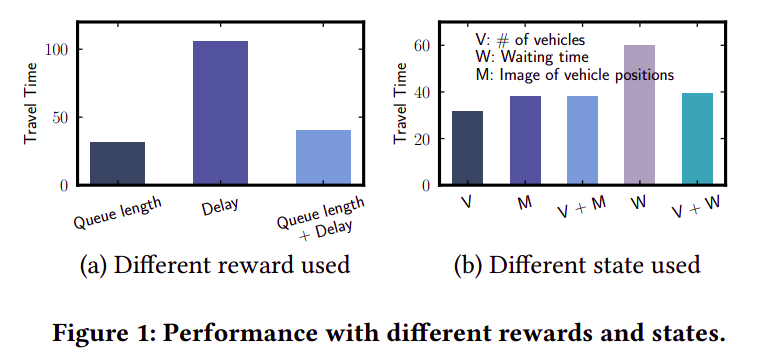

Es por esto que este paper se pregunta: ¿Existe un conjunto mínimo de features que sea suficiente para que el algoritmo de RL encuentre la política óptima? Más adelante se demuestra que, usando la recompensa como el largo de la cola, solo se necesita el número de vehículos en la cola con la señal actual del semáforo.


## 2. Related Work

__actuated methods__

__adaptative methods__


## 3. Problem Definition

El ambiente de RL describe la situación actual de una intersección de calles. El agente RL observará el ambiente y lo representará como un estado numérico $s_t$, en cada instante $t$.

Las señales del semáforo siguen un orden pre definido como $(p^0, p¹, p², ..., p{K-1}).$ En cada instante de tiempo, el agente tomará la decisiṕon de si cambiar a la siguiente señal $(a_t=1)$ o si mantener la señal actual $(a_t=0)$.

La acción $a_t$ será ejecutada en la intersección y esta pasará al siguiente estado $s_{t+1}$. Luego, la recompensa $r$ será obtenida por el ambiente, según la función $R(s_t,a_t)$.

Luego, el problema queda instanciado de la siguiente manera:

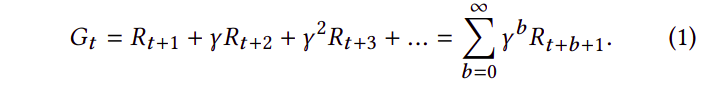

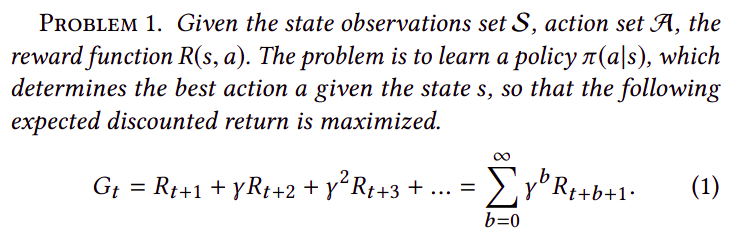

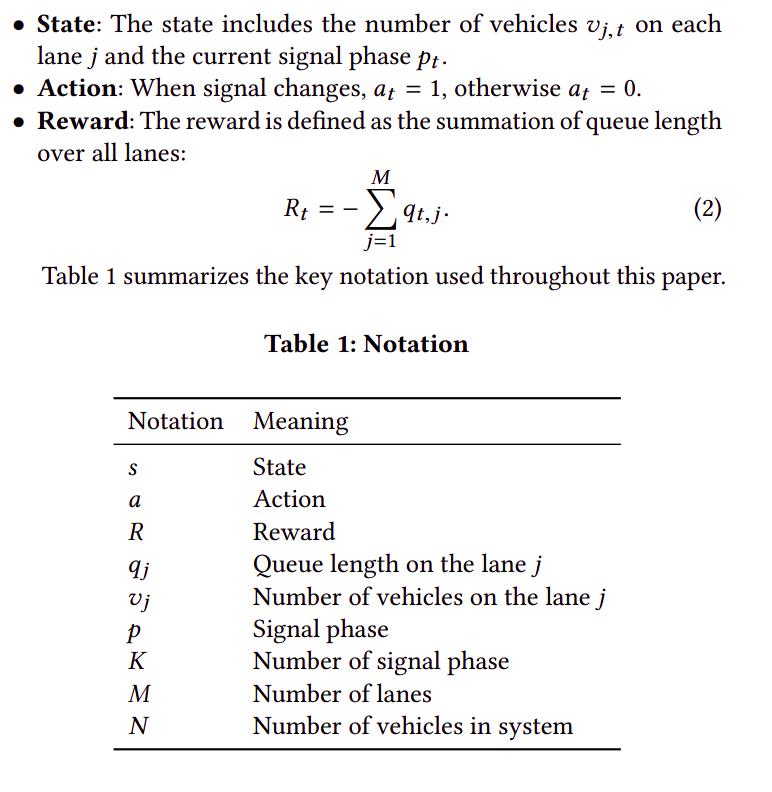

## Método

El método presentado se llama Light-Intellight (LIT). En este método se implementa una Deep Q-Network propuesta en [38].

El objetivo de esta red es maximizar la recompensa a largo plazo, dada por la __ecuación de Bellman__:

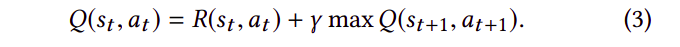

En la siguiente figura se muestra la arquitectura general del modelo:

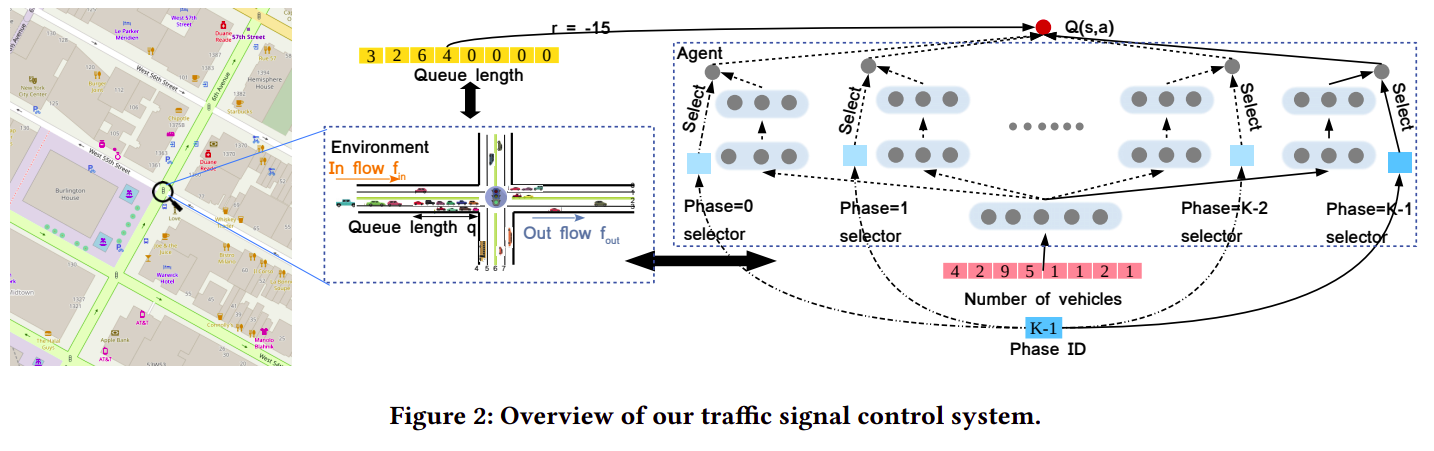

Las features de entrada, es decir, el número de vehículos $v_j$ y el indicador de fase $p$, se concatenan primero para generar un vector de embedding a través de capas fully-connected. 

Luego, se divide en $K$ caminos, uno para cada fase del semáforo, para finalmente llegar a la evaluación.

In [4]:
import torch
from torch import nn

ModuleNotFoundError: No module named 'torch'

In [1]:
class Simulation:
    
    def __init__(self):
        pass
    
    
    def change_semaphore(self):
        pass
    
    
    def get_queue_length(self):
        pass
    
    

In [3]:
class Model:
    
    def __init__(self):
        # Definir las capas de la red
        pass
    
    def forward(self):
        # Definir como la red evalua un input
        pass


In [ ]:
class Experiment:
    
    def __init__(self, simulation, model):
        self.simulation = simulation
        self.model = model
        
    def connect(self):
        pass
    
    def change_semaphore(self):
        pass
        
    def train(self):
        pass
